#                                                 Projecto integrado 1

En este projecto trabajaremos con un data de videojuegos en el cual obtendremos datos del 2016 con la intención de analizarlos con el objetivo de crear campañas publicitarias para el año 2017, esto para garantizar meojrar las ventas en relación a los datos del año previo.

En esta ocasión trabajamos para la tienda online "Ice" que vende videojuegos por todo el mundo. 

Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 

Para este trabajo identificaremos patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


# Descripción del data

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)
En la columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [1]:
#importar librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st


In [2]:
#cargar el archivo 
data= pd.read_csv("/datasets/games.csv")

In [3]:
#checar la info de las columnas general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


La primera revision nos indica datos faltantes en las columnas:

-Genre (2 filas)

-Name (2 filas)

-Critic score (mas del 50% de datos faltantes)

-User score

-Rating

In [5]:
data.head()
#mostar las primeras filas para observar la estructura del data general

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Preparación de los datos

Limpiaremos los datos a profundidad para tener la mejor calidad de datos y así poder tener mejores análisis.
Buscaremos datos duplicados, ausentes y mejoras generales que ayudarán a entender mejor los resultados a mostrar.

In [6]:
#mejorar el nombre de las columnas, pasaremos todos los nombres en minúscula
data.columns =data.columns.str.lower()

In [7]:
#verificar los cambios
data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
#verificar si existen datos duplicados
print(data.duplicated().sum())

0


In [9]:
#reemplazar valores ausentes de la columna year por 0
data ["year_of_release"] = data ["year_of_release"].fillna(0)

In [10]:
#modificar los datos de la  columna "year" a tipo int 
data ["year_of_release"] = data ["year_of_release"].astype("int")


In [11]:
#buscar la moda de la columna year para llenar nuevamente con ese dato los valores ausentes antes colocados con 0
moda= data["year_of_release"].mode()
print(moda)

0    2008
dtype: int64


In [12]:
#reemplazar valores 0 de la columna year por 2008 que es la moda
data ["year_of_release"] = data ["year_of_release"].replace(0,2008)

In [13]:
#corroborar cambios en el tipo de dato de columna year
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#conocer los datos unicos de la columna Genre
print(data["genre"].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [15]:
#Sustituir las 2 filas con valores ausentes con Other para identificar los juegos sin género y no perder esos datos
data["genre"] = data ["genre"]. fillna ("Other")

In [16]:
#conocer los datos unicos de la columna Name
print(data["name"].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [17]:
#sustituir las 2 filas con los valores ausentes con Desconocido para identificar los juegos sin nombre pero sin perder los datos
data["name"] = data["name"].fillna("Unknown")

Se cambió el estilo de los nombres de las columnas para mayor comodidad a la hora de trabajar con ellos.
Los datos faltantes de la columna Year fueron sustituidos por su dato más repetido (moda) que fue el año 2008, asi poder cambiar el tipo de formato de str a int, esto con la finalidad de poder tener un mejor uso de los datos ya que una gran parte de los datos que nos intesa analizar con lleva el analisis del año de lanzamiento, así no perderemos los datos y los datos sustituidos por 2008 no sesgaran los datos al ser analizados posteriormente.

Las  filas con genero faltante se le coloco el nombre "Other" para evitar los datos ausentes y solo no especificar el género, esto no afecta ya que 2 filas corresponden al 0.0119% de los datos a analizar, no se eliminan, pero se busca ubicarlos cambiando su género.

Lo mismo se busca con las 2 filas de nombre, no perder su informacion aunque sea insignificante y conservar sus datos para su analisis de ser necesario.

In [18]:
#vuelve a llamar a los datos ausentes para evaluar la seriedad de los datos ausentes de los Score y Rating y buscar soluciones
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Se han eliminado los valores ausentes de las primeras columnas, esto nos ayudara a tener un mejor analisis y control de los datos.
Ahora proseguiremos con las últimas columnas con más datos ausentes para buscar solución a estos datos.

In [19]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.509004,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.832683,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [20]:
print(data["critic_score"].median())

71.0


Para la columna Critic Score contengo el 51.3% de los datos sin información.
Con un promedio de 68, minimo de 13, un máximo de 98 y una mediana de 71.
Tanto la media como la mediana no tienen una gran diferencia entre ellos lo que es un buen indicador de que no existen valores atipicos. 
Se podría rellenar los valores ausentes con la media, pero esto podría afectar a que es un indicador falso sobre como ha sido evaluado el producto.

¿Por qué existen los valores que están ausentes? 

Analizando el data puede notar que los valores ausentes se presentan principalmente en video juegos que han sido lanzados hace más de 20 años, lo que es un factor común en casi todos aquellos videojuegos viejos, existen excepciones de video uegos recientes con valores ausentes, aunque la mayoría son de videojuegos del 2000 para atrás.

Esto pudo suceder ya que la digitalización de los datos pudo afectar en la pérdida de dicha información por los años que han transcurrido y que probablemente la evaluación de los videojuegos en épocas pasados no erá tan sencilla como lo es de unos años para aca.

En el caso de los videojuegos más actuales con datos ausentes más actuales pude deberse a una falla en el momento de capturar los datos o un error en el sistema que hizo que sta información se perdidera de nuestra data.

## Tratamiento de datos TBD (to be determined)

Ante el problema ya identificado y el gran porcentaje de datos que contienen valores ausentes en las ultimas  columnas, he decidido no usar ni la media ni mediana para sustituir estos valores ausentes, ya que estaria colocando datos que pueden sesgar la infomación que tenemos, al sr el 50% de los datos no veo buena opción cambiar estos valores y tampoco deseo perder la información de estos vieo juegos, por los cual tampoco se elimiinaran estas filas.

En su lugar colocaremos un -1 para identicar los valores ausentes para solo ignorar estas filas y poder trabajar los datos reales que se nos han sido porporcionados y poder hacer una proyección real para el negocio. Posteriormente los valores -1 deberan ser ignorados estrictamente.

Esto garantiza el analisis de estos videojuegos en otras categorias que no sea la puntuación y evita sesgos de los datos en estas columnas.

Para la columna User score podemos encontrar valores TBD, to be defined, los cuales nos dificultan convertir la columna a entero, para estos datos preferimos colocar un espacio vacío en vez de tbd en la columna y así poder tener un analisis más completo de los score de los juegos, esta decisión fue tomada con la finalidad de poder convertir la columna a int. Los datos TBD no son datos con los que contamos por el momento y para el analisis actual solo dificulta la tarea. No deseo perder la información pero si hacer la columna más manejable.


In [21]:
#tratamiento de los valores TBD, con replpace tbd a espacio vacio
data["user_score"] = data["user_score"].replace('tbd', -1)

In [22]:
#se sustituyen los valores ausentes con TBD para conservar las filas
data["user_score"] = data ["user_score"].fillna(-1)

In [23]:
#cambiar la columna user score a int
data ["user_score"] = data ["user_score"].astype("float")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [25]:
#se sustituyen los valores ausentes con espacio para conservar las filas
data["critic_score"] = data ["critic_score"].fillna(-1)

In [26]:
#cabio el tipo de dato de critic score
data ["critic_score"] = data ["critic_score"].astype("float")

In [27]:
#se sustituyen los valores ausentes con TBD para conservar las filas
data["rating"] = data ["rating"].fillna(" ")

In [28]:
#manda a imprimir el data para visualizar que ya no tenemos valores ausentes en el data
print(data.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Ahora se creará una nueva columna donde se sumarán las ventas tanto de EU, JP, NA y otros paises para el analisis de cada videojuego posteriormente

In [29]:
#Crear una nueva columna para sumar las 4 columnas de ventas a nivel mundial para cada juego
data["total_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]

In [30]:
#muestra nuevamente el data para confirmar la crecaión de la nueva columna
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,,31.38


# Análisis de datos

Primero analizaremos la creación de los videojuegos atraves del tiempo para comprender el crecimiento de la industria a inicios del S XXI y su evolución con el paso de los años 

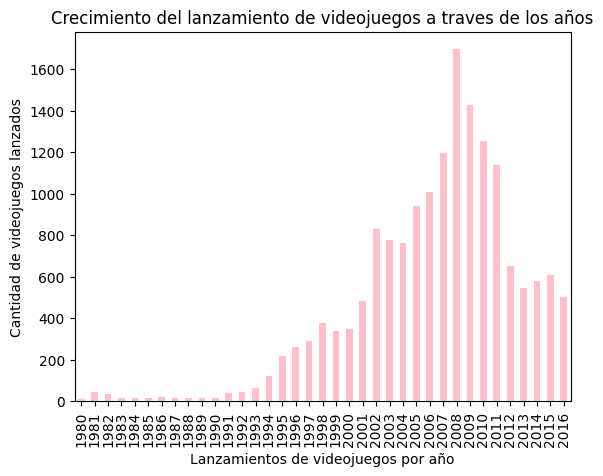

In [31]:
#Se agrupa por años de lanzamiento para ver el crecimiento de los videojuegos atraves del tiempo
games_by_year=data.groupby("year_of_release")["year_of_release"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
games_by_year.plot(x="year_of_release", kind="bar", xlabel= "Lanzamientos de videojuegos por año",
                   ylabel="Cantidad de videojuegos lanzados",
                   title="Crecimiento del lanzamiento de videojuegos a traves de los años", 
                   color="pink")
plt.show()

¿Son significativos los datos de cada período?

Podemos observar como a inicios de los 90s era muy bajo y constante, a partir de 1994 inicia un crecimiento exponencial donde 13 años después (2007) había aumentado 300% más el número de lanzamientos por año.
Pero solo inciando una disminución drástica a partir del 2009, teniendo su punto más bajo en 2013 abajo del 50% de los lanzamientos.
Aunque aparir de ese año los lanzamientos se estabilizarón no han tenido un aumento desde ese año, hasta el año actual (2016).



Ahora analizaremos cómo varían las ventas de una plataforma a otra. Comparando entre ellas la venta total lograda para tener el impacto mundial del video juego.

Asi posteriormente con esta información elegir las plataformas con las mayores ventas totales y construire una distribución basada en los datos de cada año.

In [32]:
print(games_by_year.describe())

count      37.000000
mean      451.756757
std       469.619728
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1696.000000
Name: year_of_release, dtype: float64


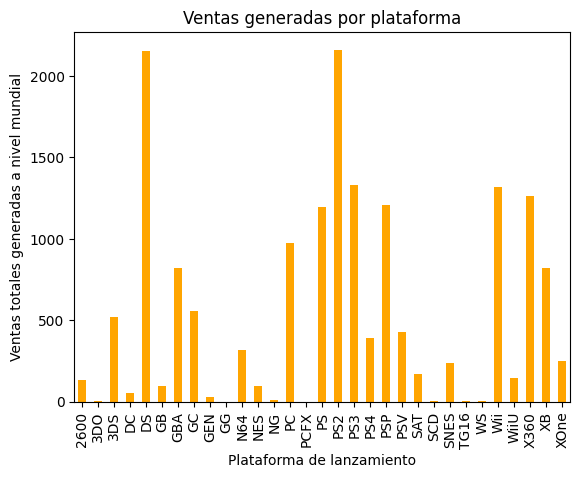

In [33]:
#Se agrupa por vents totales y plataforma de lanzamiento para su analisis.
sales_vs_platform=data.groupby("platform")["total_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
sales_vs_platform.plot(x="platform", kind="bar", xlabel= "Plataforma de lanzamiento",
                   ylabel="Ventas totales generadas a nivel mundial",
                   title="Ventas generadas por plataforma", 
                   color="orange")
plt.show()

Se escogeran las 5 plataformas más populares según sus ventas para su análisis:

-DS

-PS2

-PS3

-WII

-X360

Ya con las plataformas a trabajar se construirá una distribución basada en los datos de cada año de sus ventas y analizar que ha pasado con dichas plataformas en los últimos años.

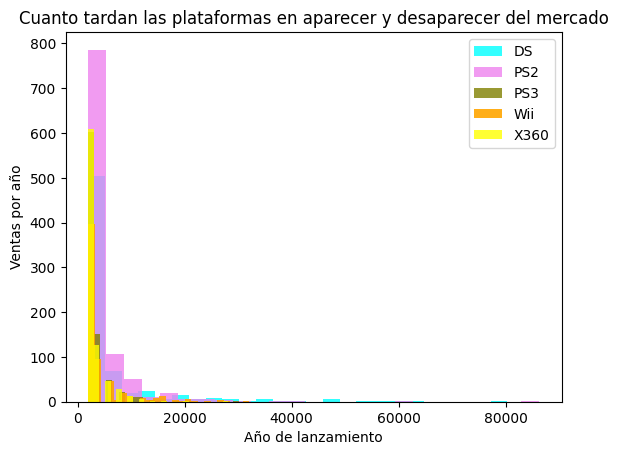

In [34]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

#Se construye una distribución basada en los datos por año de sus ventas totales
# Comparan las 5 plataformas seleccionadas y sus ventas con un histograma.
#se filtra cada plataforma con las ventas totales
data[data["platform"]== "DS"].groupby(["year_of_release", "total_sales"])["year_of_release"].sum().plot(kind= "hist", bins=25, alpha=0.8, color= "aqua")
data[data["platform"]== "PS2"].groupby(["year_of_release", "total_sales"])["year_of_release"].sum().plot(kind= "hist", bins=25, alpha=0.8, color= "violet")
data[data["platform"]== "PS3"].groupby(["year_of_release", "total_sales"])["year_of_release"].sum().plot(kind= "hist", bins=25, alpha=0.8, color= "olive")
data[data["platform"]== "Wii"].groupby(["year_of_release", "total_sales"])["year_of_release"].sum().plot(kind= "hist", bins=25, alpha=0.9, color= "orange")
data[data["platform"]== "X360"].groupby(["year_of_release", "total_sales"])["year_of_release"].sum().plot(kind= "hist", bins=25, alpha=0.8, color= "yellow")

#añade informacion al gráfico para mejor visualización
plt.title("Cuanto tardan las plataformas en aparecer y desaparecer del mercado")
plt.legend(["DS","PS2", "PS3", "Wii", "X360"])
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas por año")
plt.show()

Basado en los analisis pasados podemos determinar que para el modelo buscado para el 2017, tomaremos en cuenta de la media en adelante, esto ya que la media que inicia en 2008 que el punto más grande de ventas registrado en la historia hasta el momento y aunque ha disminuido es un buen punto partida, ya que buscamos comparar los años siguientes hasta la actualidad (2016) para lograr con tener el mejor analisis de como ha cambiando los video juegos y hacer una correcta proyección para las vetas del siguiente año.

Es por eso que hemos decidido ignorar los datos del año 2008 hacia atrás en los siguientes analisis.
Apartir de este momento solo visualiaremos los datos de nustras 5 plataformas con mejores ventas ya definidas anteriormenete (DS, PS2, PS3, WII,X360)  en los años seleccionados.

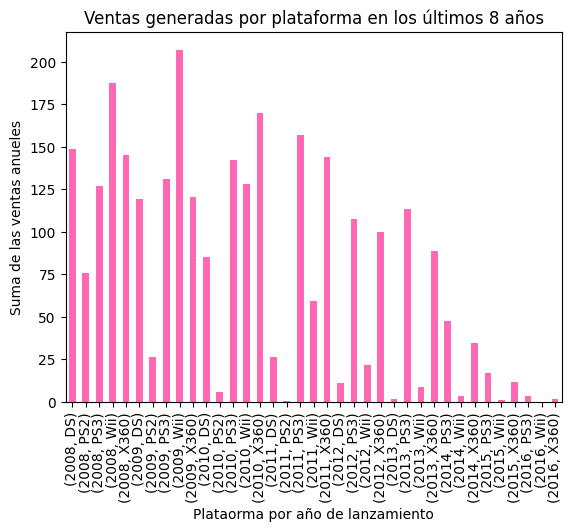

In [35]:
#se crea un filtro para seleccionar los videojuegos y del año 2008 en adelante
select_platforms= ["PS2", "PS3", "DS", "Wii", "X360"]


select= data[(data["year_of_release"] >= 2008) & (data ["platform"].isin(select_platforms))]

#agrupar por plataformas y años y suma y ventas totales
final_select= select.groupby(["year_of_release", "platform"])["total_sales"].sum()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
final_select.plot(x="year_of_release", kind="bar", xlabel= "Plataorma por año de lanzamiento",
                   ylabel="Suma de las ventas anueles",
                   title="Ventas generadas por plataforma en los últimos 8 años", 
                   color="hotpink")

plt.show()

Como podemos observar aunque el 2008 fue un gran año para las ventas de video juegos las ventas cayeron drásticamente para todas las plataformas logrando sobevivir únicamente PS3 Y X360 del 2014 para el año 2016.

¿Cuáles crecen y cuáles se reducen? 
Aunque ninguna plataforma tuvo un gran crecimeinto en los últimos años de nuestras 5 plataormas con más ventas lás que mejores ventas logran tener hasta 2014 fueron PS3 Y X360.
Del 2008 al 2013 desaparecieron las centan de las plataformas DS, PS2 Y WII

Las plataformas más rentables hasta el momento basado en ventas  existencia actual son la plataforma XBOX 360  PS3, que aunque sus ventas disminuyeron drásticamente en los últimos 2 años Elige varias plataformas potencialmente rentables.

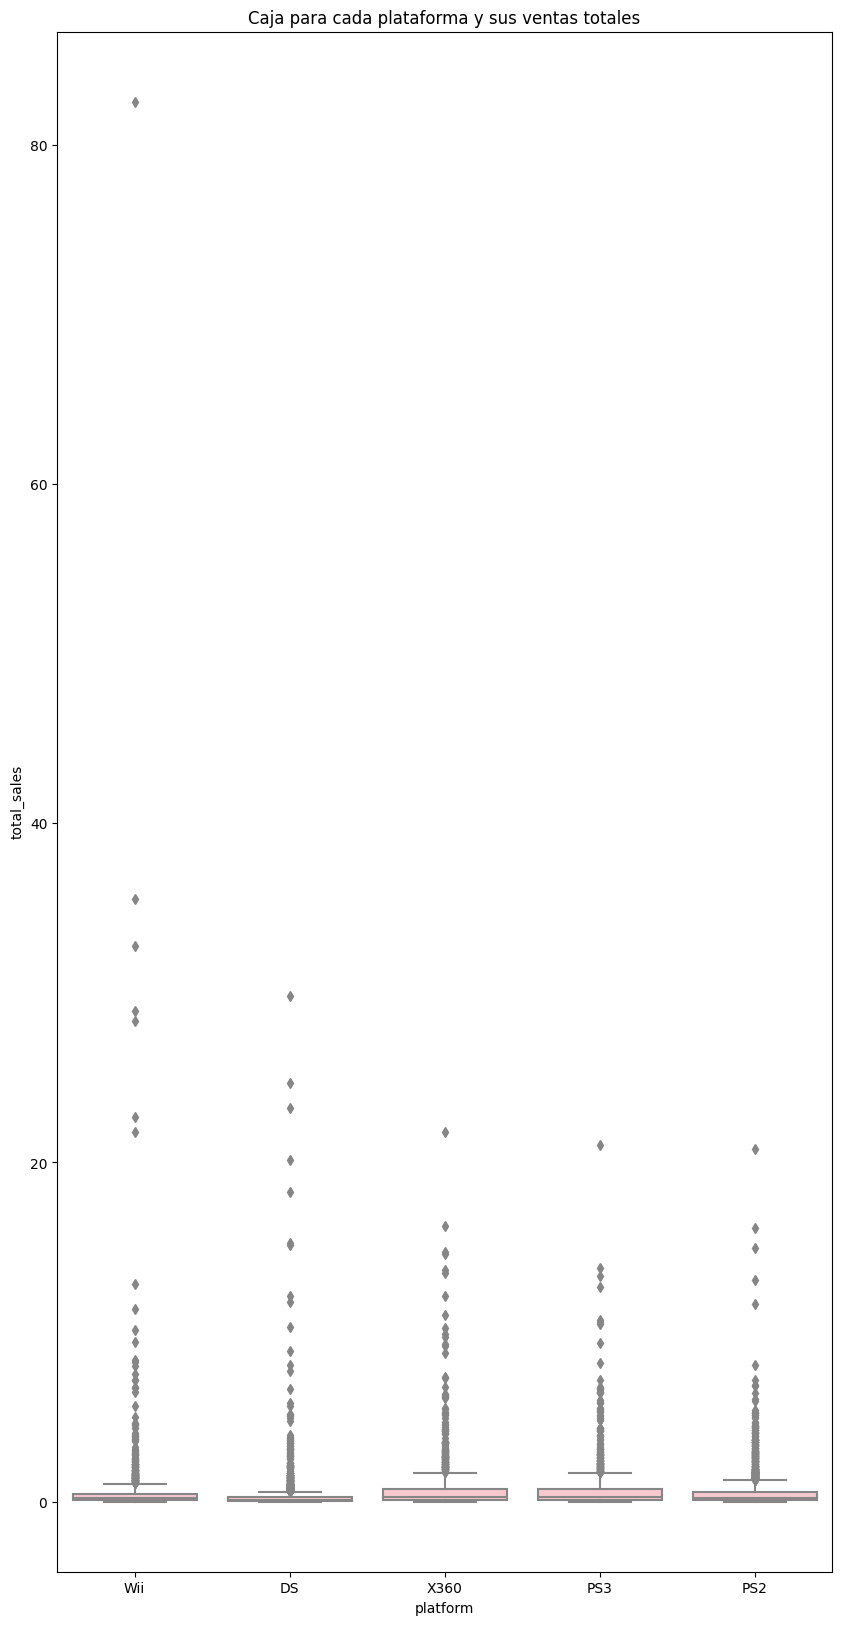

In [36]:
# Traza un diagrama de caja para visualizar las ventas globales de los video juegos, desglosados por plataforma.

#filtro para solo graficar las plataormas seleccionadas
plataformas = data[data["platform"].isin(["PS2", "PS3", "DS", "X360", "Wii"])] 


fig = plt.figure(figsize =(10, 20))

#creacion de la grafica de caja
sns.boxplot(data= plataformas, 
            x="platform", y="total_sales", color="pink")

plt.title("Caja para cada plataforma y sus ventas totales")
plt.show()

In [37]:
#saca el zscore para filtrar los valores atípicos del data en la columna total_sales

z_score = st.zscore(data['total_sales']) #saca zscore de la columna totales sales
abs_z_score = np.abs(z_score)
outliers = data[abs_z_score > 3] #se filtra a 3 desviaciones
outliers.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,,31.38


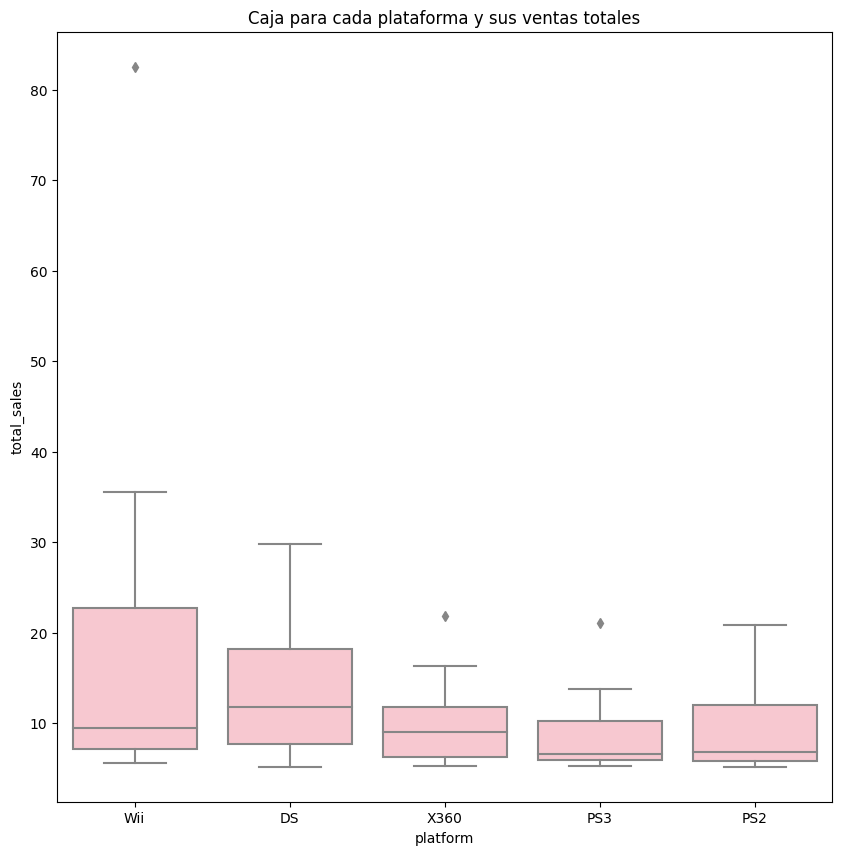

In [38]:
# Traza nuevamente un diagrama de caja para visualizar las ventas globales de los video juegos, 
#ya con los datos atipicos eliminadoses.

#filtro con el data filtrado para solo gráficar las plataformas seleccionadas
platafor_filtro = outliers[outliers["platform"].isin(["PS2", "PS3", "DS", "X360", "Wii"])] 


fig = plt.figure(figsize =(10, 10))

#creacion de la grafica de caja
sns.boxplot(data= platafor_filtro, 
            x="platform", y="total_sales", color="pink")

plt.title("Caja para cada plataforma y sus ventas totales")
plt.show()

¿Son significativas las diferencias en las ventas? 
En este diagrama podemos observar que en gneral las cajas del X360, PS Y PS2 Sson muy parecidas, pero Wii y Ds son menores, el problema radica en los valores atipicos que esta presentando sobre todo wii para tener un gráfico más claro, debemos evaluar los valores y pensar si se pueden eliminar para una mejor visulaización de la gráfica.

¿Qué sucede con las ventas promedio en varias plataformas? 
Las ventas para los 5 juegos seleccionados son las mejores ventas que se tienen de todas las plataformas, el problema en todas radica en la cantidad de ventas atipicas muyy altas que se realizaron de ciertas plataformas lo que sesga el analisis objetivo de nuestras plataformas, se debe evaluar que hacer con dichos valores para tener un analisis más detallado sobre las ventas de nuestra top 5 de plataformas.

Ahora analizaremos como las reseñas de los usaurios y los profesionales han afectado a la plataforma que considermos la más importante basado en los analisis anteriores- PS2.

*Recordemos que el 50% de los datos de estas columnas no están disponibles y se encontrarán con datos -1 por lo que analizaremos esta plataforma solo con los datos positivos, esto para considerar que la muestra será mucho menor.

In [39]:
#se crea una nueva columna sumando ambas columnas de evaluación para su analisis general
data["total_score"]= data["user_score"] + data["critic_score"]

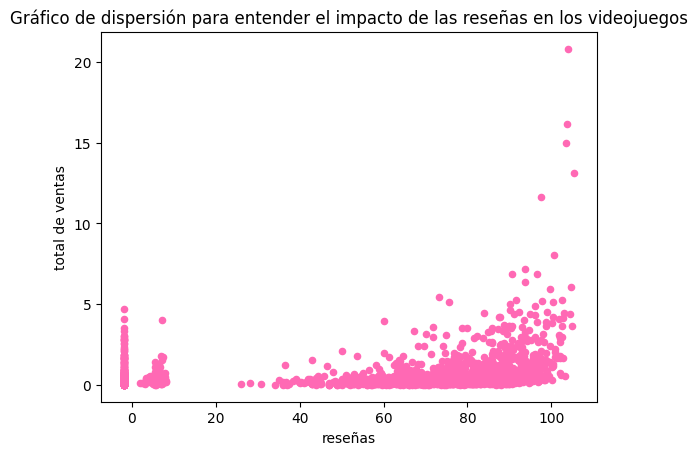

In [40]:
# Se crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

#Se filtra por reseñas y solo videojuegos de la plataforma PS2
sales_ps=data[data["platform"]== "PS2"]
               
               
#Se crea un gráfico de barras para mejor visualización de los datos agrupados
sales_ps.plot( x="total_score", y="total_sales", kind="scatter", xlabel= "reseñas", ylabel="total de ventas",
            title="Gráfico de dispersión para entender el impacto de las reseñas en los videojuegos", color="hotpink")
               
plt.show()

Antes de empezar los puntos situados en el 0 serán datos ignorados ya que recordemos fue un valor colcado para sustituir los valores ausentes en el data.

Podemos observar como si hay una relación entre mayor es la puntuacion de nuestros juego mayores ventas se ven registradas, influyendo en los reseñas directamnete en las ventas de nuestros bideo juegos en la plataforma PS2.

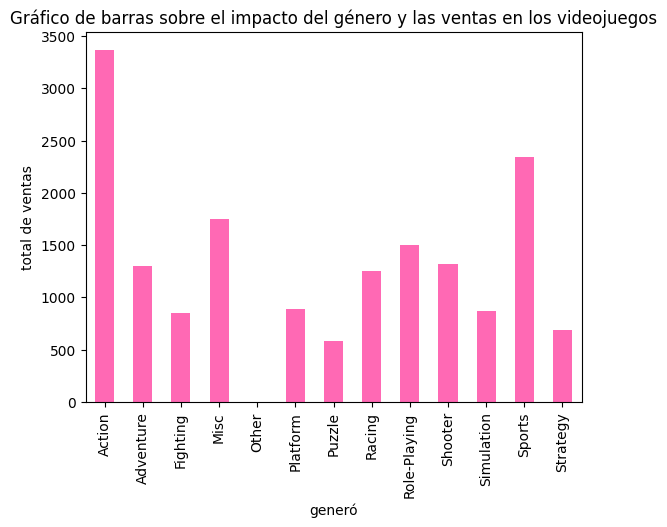

In [41]:
# Analizaremos la distribución general de los juegos por género.
sales_by_genre=data.groupby("genre")["total_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos
sales_by_genre.plot( x="genre", y="total_sales", kind="bar", xlabel= "generó", ylabel="total de ventas",
            title="Gráfico de barras sobre el impacto del género y las ventas en los videojuegos", color="hotpink")
               
plt.show()


Los generos más rentables a nivel mundial son Acción, Sports, Misc, Role- Playing principalmente.

No encuentro alguna relación o patron sobre el grupo de generos que producen mayores ventas a los que producen menos ventas. 
Tendría que conocer más a fondo de forma general de que trata cada genero para entender si existe un patron evidene ante dicha información y como es que se relaciona con las ventas a nivel mundial.

# Perfil de usuario por región 

En la siguiente sección analizaremos como los juegos tienen ventas e impactos diferentes dependiendo las diferentes regiones del mundo donde fue vendido. 

Esto nos dará mayor información sobre las preferencias dependiendo el contienento donde se vende y el impacto en las ventas.

Analizaremos las 3 regiones principales proporcionadas por el data NA (Norte America), UE (Europa) y JP (Japón)

Las siguientes 3 gráficas nos mostrarán las principales pataformas de usa dependiendo la región

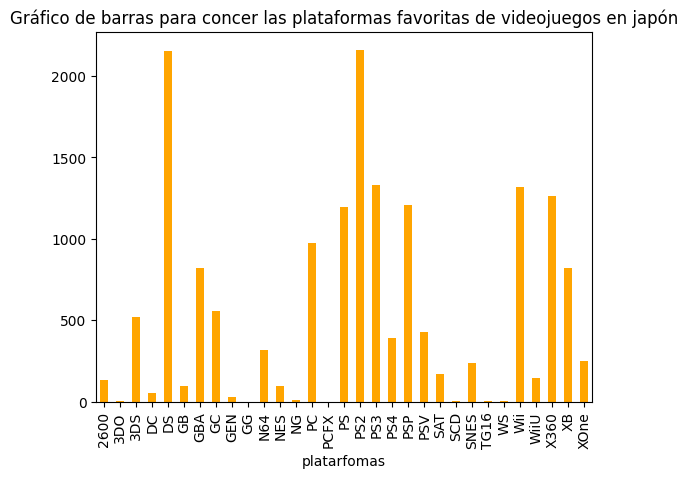

In [42]:
# se agrupa por plataformas para japón
jp_genre= data.groupby(["platform"])["jp_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
jp_genre.plot(x="platform", kind="bar", xlabel= "platarfomas",
        title="Gráfico de barras para concer las plataformas favoritas de videojuegos en japón", 
        color="orange")
plt.show() #muestra la gráfica

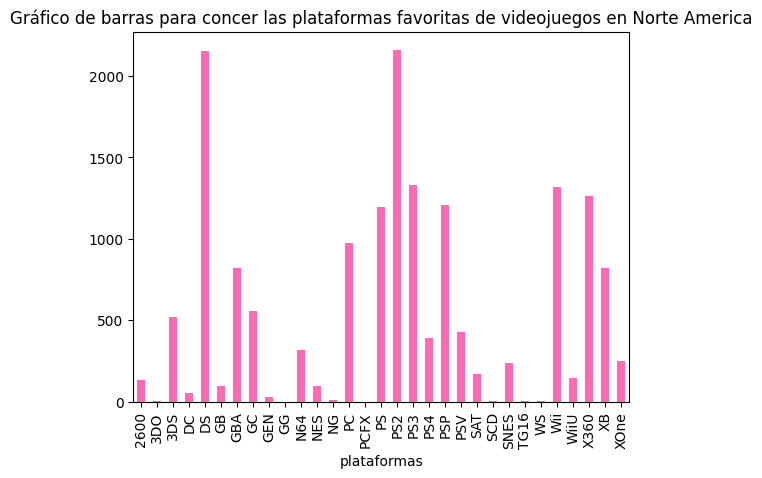

In [43]:
# se agrupa por plataformas para Norte America
na_genre= data.groupby(["platform"])["na_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
na_genre.plot(x="platform", kind="bar", xlabel= "plataformas",
        title="Gráfico de barras para concer las plataformas favoritas de videojuegos en Norte America", 
        color="hotpink")
plt.show() #muestra la gráfica

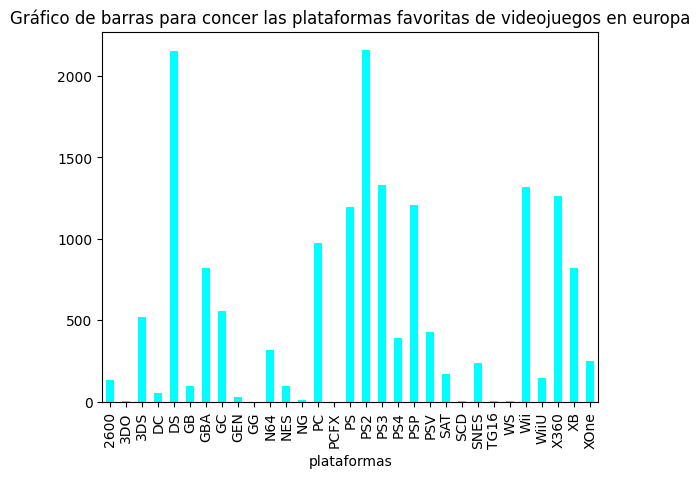

In [44]:
# se agrupa por plataformas para europa
eu_genre= data.groupby(["platform"])["eu_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
eu_genre.plot(x="platform", kind="bar", xlabel= "plataformas",
        title="Gráfico de barras para concer las plataformas favoritas de videojuegos en europa", 
        color="aqua")
plt.show() #muestra la gráfica

#Describe las variaciones en sus cuotas de mercado de una región a otra
Analizando los resultados en las gráficas, las 3 regiones coinciden con las plataformas de uso más populares.
Las 3 plataformas coincien con su mayor uso en la plataforma, DS, PS2 y Wii.
Japon tiene preferencia con PS, y Europa y Norte America tienen preferencia con Xbox 360.

Esto nos puede hablar de la popularidad de estas plataformas a nivel mundial, se tendría que analia a fondo las diferencecias entre plataformas por las cuales las  regiones más importantes a nivel mundial prefieren las mismas plataromas, generando las mejores ventas en todas las plataformas al mismo nivel en cada plataforma.

Ahora analizaremos cada región y los generos principales para conocer los gustos por continente 

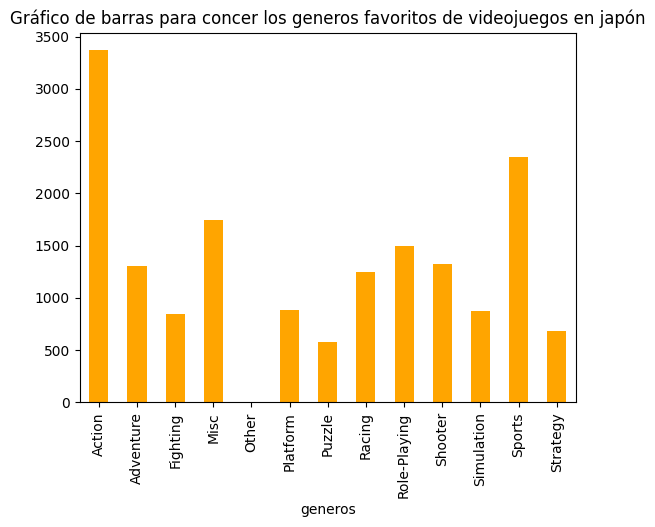

In [45]:
# se agrupa por genero para japón
jp_genre= data.groupby(["genre"])["jp_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
jp_genre.plot(x="genre", kind="bar", xlabel= "generos",
        title="Gráfico de barras para concer los generos favoritos de videojuegos en japón", 
        color="orange")
plt.show()

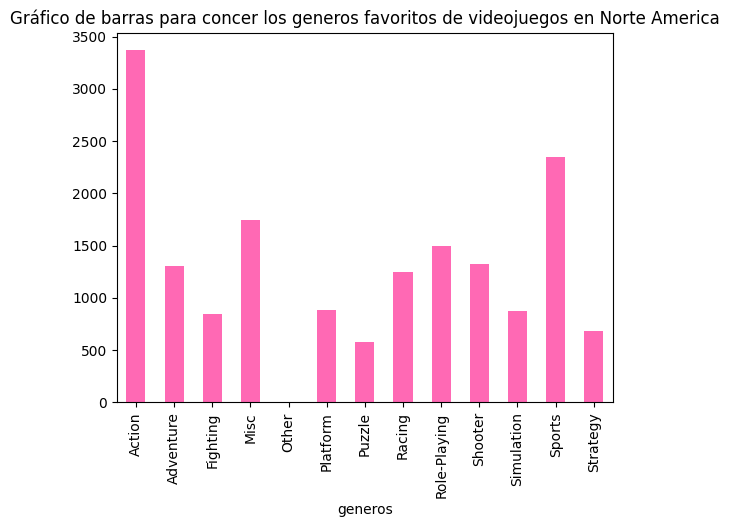

In [46]:
# se agrupa por genero para norte america
na_genre= data.groupby(["genre"])["na_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
na_genre.plot(x="genre", kind="bar", xlabel= "generos",
        title="Gráfico de barras para concer los generos favoritos de videojuegos en Norte America", 
        color="hotpink")
plt.show()

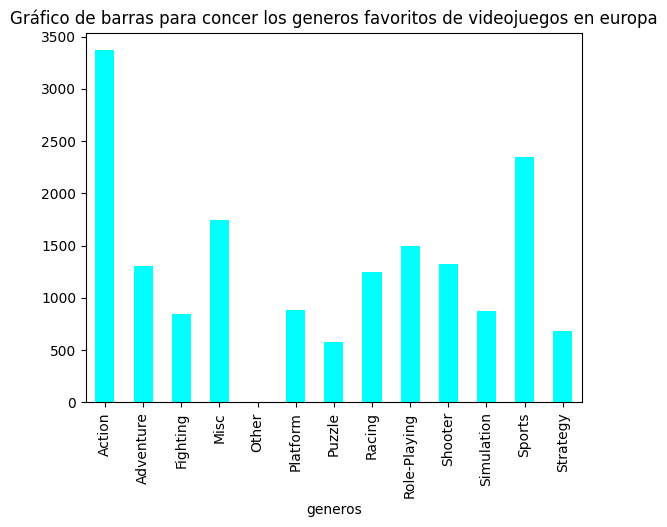

In [47]:
# se agrupa por genero para europa
eu_genre= data.groupby(["genre"])["eu_sales"].count()

#Se crea un gráfico de barras para mejor visualización de los datos agrupados
eu_genre.plot(x="genre", kind="bar", xlabel= "generos",
        title="Gráfico de barras para concer los generos favoritos de videojuegos en europa", 
        color="aqua")
plt.show()

Es intresante analizar todas las gráficas y darnos cuenta que en todas las regiones los generos que predominan en su totalidad son Action, Sports y Misc.
Por regiones se esperaria que los generos busados pueden ser difernetes, pero la poblacon en general sin importar la localizacion geografica estan buscando los mismos juegos para su consumo.
Esto lo sabemos ya que se tomo en cuenta para estas graficas las ventas en cada region generadas.

# Prueba de hipótesis

Pondremos a prueba las siguientes 2 hipótesis a las cuales pondremos a prueba mediante las pruebas corrspondientes para determinar si podemos aceptarlas o no en el caso de cada una:

#hipotesis a analizar


Ho:
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1:
Las calificaciones promedio de los usuarios para las plataformas Xbox One no PC son las mismas.


Alpha= 0.05

In [51]:
# Prueba las hipótesis
# Separar los datos por plan para su analisis
#se haceun segundo filtro para usar solo los valores iguales o mayor a 0 para eliminar los datos -1 colocados anteriormente
xboxone = data[(data['platform'] == 'XOne') & ( data ["user_score"] >= 0)]["user_score"] 
pc = data[( data['platform'] == 'PC') & ( data ["user_score"] >= 0)]["user_score"]

#coloca un nivel de significancia estadistica critica del 5%
alpha= 0.05

#mostar resultados
results=st.ttest_ind(xboxone, pc)

#imrime el valor p
print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la Ho")
    
else:
    print("No se rechaza la Ho")

Valor p: 1.3896435533548819e-05
Se rechaza la Ho



— Nuestra pregunta en esta ocasión erá conocer si la puntuación que se le daba a las plataormas Xbox One y Pc erán en general iguales, y esto poder tener relevancia si lo comparamos con las gráficas anteriores y comprobar la relación entre ambas plataformas. Para esta prueba se dio un 5% de valor de diferencia para poder tener un margén para hacer la prueba.

— Para esta prueba usamos la prueba T de Student, para observar si existen diferencias significtivas entre ambos grupos a comparar y así poder comprobar si se puede rechazar o aceptar las hipotesis planteadas.

Al comparar gráficas y las pruebas de estadisica, quitando los valores -1 colocados estrategicamente para no perder la información de los videojuegos, podemos concluir que las plataformas Xbox One y Pc NO SON IGUALES en su forma de ser evaluadas. Los usuarios no tienen una critica igual sobre ambas plataformas. 
Dicha información se puede corroborar en las gráficas al ver que sus Score no son siquiera cercanas. Tal vez entre otras plataformas la hipótesis nula podría aceptarse, pero con estas 2 plataformas NO. 

Es por esto que se rechaza la h0 la cual plantea que no existen diferencias entre plataformas.

hipotesis  2 a analizar


Ho: 
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

H1:
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


Alpha=0.05

In [52]:
# Prueba las hipótesis
# Separar los datos por plan para su analisis
# se hace un segundo filtro para eliminar los datos -1 colocados anteriormente
sports = data[(data['genre'] == 'Sports') &  ( data ["user_score"] >= 0)]['user_score']
action= data[(data['genre'] == "Action") &  ( data ["user_score"] >= 0)]['user_score']

#coloca un nivel de significancia estadistica critica del 5%
alpha= 0.05

#muestra de resultados
results=st.ttest_ind(sports, action)

#imrime el valor p
print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la Ho")
    
else:
    print("No se rechaza la Ho")

Valor p: 0.10406951359049141
No se rechaza la Ho



— Para esta segunda hipótesis se busca conocer si la puntuación dada a los géneros de Acción y Deportes son iguales o existen diferencias significativas entre ambos. Para esta prueba se dio un 5% de valor alpha de diferencia para poder tener un margén para hacer la prueba.

— Para esta prueba usamos la prueba T de Student, para observar si existen diferencias significtivas entre ambos grupos a comparar y así poder comprobar si se puede rechazar o aceptar las hipotesis planteadas.

Al realizar las pruebas de estadistica podemos concluir que los generos Deportes y Acción SON IGUALES en su forma de ser evaluadas. 
Anteriormente si tomabamos en cuenta los número -1 colocados, nos daba que había diferenia significativa.
Al agregar el segundo filtro y eliminar los datos no obtenidos reales por los usuarios, podemos concluir que ambos géneros tienen una evaluación muy diferente entre ellos.
Dicha información se puede corroborar en las gráficas vistas previamente en el documento. 

Es por esta razón que No se rechaza la h0, la cual plantea que: H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

# Conclusión general

Aunque el mundo de los videojuegos es un mundo fascinante para todos aquellos que lo conocen, es evidente que de unos años para aca ha tenido una caída grave en cuanto a ventas, esto hablando de todas las plataformas analizadas.

Aunque no han desaparecido en su totalidad las ventas ya no son lo que eran hace 8 años (2008).

Los generos que se mantienen  a nivel mundial más fuertes en cuanto a su venta son Acción y Deportes, es importante enfocarnos en esos dos ya que son los que mejores resultados han dado este último año.

Existen plataformas como PS3 Y DS que se posicionan como las mejores en ventas, se puede crear un enfoque nuevamente en esas plataformas para la estrategia buscada para el siguiente año.

Aunque los mercados entre norte america, europa y japon son muy variados, en cuestión de videojuegos se comportan de manera similar en cuanto al genero y plataforma lo que nos ayuda a buscar una estrategia similar para todas las regiones.

